# Importar librerías


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Cargamos datos y Dividimos en train y validation




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path='drive/My Drive/keepcoding/deep_learning/'

In [4]:
# Cargamos datos de train limpios
train_clean = pd.read_csv(path+'train_clean.csv')
im_train=np.load(path+'im_train.npy', allow_pickle=True)

print(f'Dimensiones del dataset de training: {train_clean.shape}')
print(f'Dimensiones del dataset de imagenes: {im_train.shape}')


Dimensiones del dataset de training: (1800, 43)
Dimensiones del dataset de imagenes: (1800, 224, 224, 3)


In [5]:
trainy = train_clean['Price'].values    # nos quedamos con price
trainX = train_clean.drop(['Price'],axis=1).values     # nos quedamos con el resto
feature_names_train = train_clean.drop(['Price'],axis=1).columns


In [6]:
# dividimos de nuevo train para crear validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(trainX, trainy, test_size=0.2, random_state=7)

im_train, im_val = train_test_split(im_train, test_size=0.2, shuffle=False, random_state=7)

print(f'Dimensiones del dataset de training: {X_train.shape}')
print(f'Dimensiones del dataset de validation: {X_val.shape}')

print(f'Dimensiones del dataset imagenes de training: {im_train.shape}')
print(f'Dimensiones del dataset imagenes de validation: {im_val.shape}')

y_train=y_train.reshape(-1, 1)
y_val=y_val.reshape(-1, 1)

Dimensiones del dataset de training: (1440, 42)
Dimensiones del dataset de validation: (360, 42)
Dimensiones del dataset imagenes de training: (1440, 224, 224, 3)
Dimensiones del dataset imagenes de validation: (360, 224, 224, 3)


In [8]:
y_val_original=y_val

In [7]:
from sklearn.preprocessing import MinMaxScaler
XScalerFit=MinMaxScaler()
yScalerFit=MinMaxScaler()
 
# Storing the fit object for later reference
XScalerFit=XScalerFit.fit(X_train)
yScalerFit=yScalerFit.fit(y_train)
 
# Generating the standardized values of X and y
X_train=XScalerFit.transform(X_train)
y_train=yScalerFit.transform(y_train)
X_val=XScalerFit.transform(X_val)
y_val=yScalerFit.transform(y_val)


In [8]:
# save the scaler
from pickle import dump
dump(XScalerFit, open(path+'XScalerFit.pkl', 'wb'))
dump(yScalerFit, open(path+'yScalerFit.pkl', 'wb'))

In [9]:
# # Escalamos para dejar y_train entre 0 y 1
# # y = (x – min) / (max – min)

# min_y=min(y_train)
# max_y=max(y_train)
# y_train = (y_train - min_y) / (max_y - min_y)

print(f'Y_train está ahora entre : {max(y_train)} y {min(y_train)}')

Y_train está ahora entre : [1.] y [0.]


# Modelo ANN - datos numéricos y categóricos

[INFO]: Entrenando red neuronal...
Epoch 1/100
45/45 [==============================] - 6s 7ms/step - loss: 0.1056 - val_loss: 0.0312
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0327 - val_loss: 0.0301
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0312 - val_loss: 0.0275
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0303 - val_loss: 0.0269
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.0244
Epoch 6/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0308 - val_loss: 0.0237
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0295 - val_loss: 0.0255
Epoch 8/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0294 - val_loss: 0.0231
Epoch 9/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0282 - val_loss: 0.0232
Epoch 10/100
45/45 [==============================] - 0s 4ms/step - loss: 

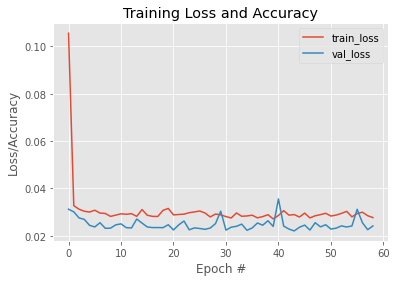

In [11]:

# Imports necesarios
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping


# Hiper-parámetros de nuestra red
lr = 0.01
n_epochs = 100
# batch_size = 128

# Implementamos la red empleando Keras
model = Sequential()

# model.add(Dense(80, activation='relu')) 
# model.add(Dropout(0.5))
model.add(Dense(50, activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(1)) 

tf.keras.backend.clear_session() 

# Compilamos y entrenamos 
print("[INFO]: Entrenando red neuronal...")
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=lr)) 
es = EarlyStopping(monitor='val_loss', mode='min', patience=15) 
H = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, callbacks=[es])  



# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

model.summary()

In [12]:
# Predicción con validation
y_predval=model.predict(X_val)
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_predval_original=yScalerFit.inverse_transform(y_predval)

TestingData_norm=pd.DataFrame()
TestingData_norm['Price']=pd.DataFrame(y_val)
TestingData_norm['PredictedPrice']=pd.DataFrame(y_predval)
 
TestingData=pd.DataFrame()
TestingData['Price']=pd.DataFrame(y_val_original)
TestingData['PredictedPrice']=pd.DataFrame(y_predval_original)
TestingData.head()

12/12 [==============================] - 0s 3ms/step


,Price,PredictedPrice
0,40.0,46.347305
1,40.0,34.233025
2,82.0,105.476494
3,25.0,34.233025
4,60.0,37.277275


In [13]:
# Evaluamos el modelo con datos de test
import math
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

# calculate root mean squared error

rmse = math.sqrt(mean_squared_error(y_predval_original, y_val_original))
print('Test Score: %.2f RMSE' % (rmse))

# calculate mae: mean absolute error

mae = mean_absolute_error(y_predval_original, y_val_original)
print('Test Score: %.2f MAE' % (mae))

# calculamos mape
mape = mean_absolute_percentage_error(y_predval_original, y_val_original)
print('Test Score: %.2f MAPE' % (mape))

results=pd.DataFrame()
results['Modelo']=['ANN']
results['RMSE']=rmse
results['MAE']=mae
results['MAPE']=mape
results['nombre_modelo']='model_ANN.h5'


Test Score: 46.94 RMSE
Test Score: 20.26 MAE
Test Score: 0.38 MAPE


In [14]:
# guardamos modelo entrenado
%mkdir "modelos"


model.save(path+'modelos/model_ANN.h5')


mkdir: cannot create directory ‘modelos’: File exists


In [15]:
results.head()

,Modelo,RMSE,MAE,MAPE,nombre_modelo
0,ANN,46.936785,20.264633,0.382584,model_ANN.h5


## Optimización de hiperparametros ANN

In [16]:
#voy a utilizar hiperopt
!pip install networkx==1.11 # para instala hyperopt correctamente, si no, da errores
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# imports necesarios
import sys
import time
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials




space =  {
    'dropout' : hp.uniform('dropout',0.0,0.8),
    'neurons_dense1': hp.choice('neurons_dense1', [10,20,50,100,256,512,1024]),
    'neurons_dense2': hp.choice('neurons_dense2', [10,20,50]),
    'learning_rate': hp.choice('learning_rate',[0.1,0.01,0.001,0.0001]),
    'n_epochs': hp.choice('n_epochs',[50,100,200,500])
}

# nos definimos unos callbacks para que la red pare cuando no vea mejora 

def	get_callbacks(pars):
  callbacks	= [EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, mode='auto')]
  return callbacks

def mi_cnn(pars):
  print ('Parameters: ', pars)
  model = Sequential()
  
  # Arquitectura
  model = Sequential()

  model.add(Dense(pars['neurons_dense1'], activation='relu')) 
  model.add(Dropout(pars['dropout']))
  model.add(Dense(pars['neurons_dense2'], activation='relu')) 
  model.add(Dropout(pars['dropout']))
  model.add(Dense(1)) 

 # Compilamos y entrenamos 

  model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=pars['learning_rate'])) 
  H = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=pars['n_epochs'], callbacks=get_callbacks(pars)) 

  print(H.history)
  
  best_epoch_loss = np.argmin(H.history['val_loss'])
  best_val_loss = np.min(H.history['val_loss'])
  
  print('Epoch {} - val loss: {}'.format(best_epoch_loss, best_val_loss))
  sys.stdout.flush()
  
  return {'loss': best_val_loss, 'best_epoch': best_epoch_loss, 'eval_time': time.time(), 'status': STATUS_OK, 'model': model, 'history': H}

In [18]:
# ejecutamos la optimización
trials = Trials()
best = fmin(mi_cnn, space, algo=tpe.suggest, max_evals=20, trials=trials)
print(best)

Se han truncado las últimas 5000 líneas del flujo de salida.

Epoch 26/200

45/45 [==============================] - 0s 7ms/step - loss: 0.0549 - val_loss: 0.0383

{'loss': [0.6737178564071655, 0.5665625333786011, 0.4842328429222107, 0.44571906328201294, 0.3827593922615051, 0.32550477981567383, 0.2882819175720215, 0.23047706484794617, 0.21254488825798035, 0.1760304719209671, 0.15822376310825348, 0.13983634114265442, 0.1297881007194519, 0.11857366561889648, 0.10718721896409988, 0.09564158320426941, 0.08597827702760696, 0.0797116830945015, 0.07367070019245148, 0.06812278926372528, 0.06617426127195358, 0.0637810155749321, 0.06080480292439461, 0.05888952687382698, 0.05606303736567497, 0.054908137768507004], 'val_loss': [0.1295749843120575, 0.09510944038629532, 0.08624722063541412, 0.0799417644739151, 0.07227317988872528, 0.0628240779042244, 0.05585045740008354, 0.04937101900577545, 0.045988865196704865, 0.043001607060432434, 0.04154900833964348, 0.0404624380171299, 0.0394311249256134, 0.03

In [19]:
space_dict =  {
    'neurons_dense1': [10,20,50,100,256,512,1024],
    'neurons_dense2': [10,20,50,100,256,512,1024],
    'learning_rate': [0.1,0.01,0.001,0.0001],
    'n_epochs': [50,100,200,500]
}

print('El valor de dropout opt es: '+str(best['dropout']))
print('El valor de opt neurons_dense1 es: '+str(space_dict['neurons_dense1'][best['neurons_dense1']]))
print('El valor de opt neurons_dense2 es: '+str(space_dict['neurons_dense2'][best['neurons_dense2']]))

print('El valor de opt n_epochs es: '+str(space_dict['n_epochs'][best['n_epochs']]))
print('El valor de opt learning_rate es: '+str(space_dict['learning_rate'][best['learning_rate']]))


El valor de dropout opt es: 0.014911946968065594
El valor de opt neurons_dense1 es: 100
El valor de opt neurons_dense2 es: 20
El valor de opt n_epochs es: 100
El valor de opt learning_rate es: 0.01


[INFO]: Entrenando red neuronal...
Epoch 1/100
45/45 [==============================] - 2s 10ms/step - loss: 0.1278 - val_loss: 0.0320
Epoch 2/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0378 - val_loss: 0.0335
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0297 - val_loss: 0.0238
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0283 - val_loss: 0.0236
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0270 - val_loss: 0.0227
Epoch 6/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0276 - val_loss: 0.0272
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.0240
Epoch 8/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0277 - val_loss: 0.0225
Epoch 9/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.0264
Epoch 10/100
45/45 [==============================] - 0s 5ms/step - loss:

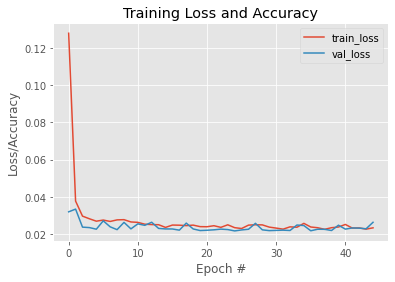

In [20]:
# Utilizando los parametros optimizados
lr = space_dict['learning_rate'][best['learning_rate']]
n_epochs = space_dict['n_epochs'][best['n_epochs']]
dropout_opt=best['dropout']
neurons_dense1=space_dict['neurons_dense1'][best['neurons_dense1']]
neurons_dense2=space_dict['neurons_dense2'][best['neurons_dense2']]

# Implementamos la red empleando Keras
model_opt = Sequential()

model_opt.add(Dense(neurons_dense1, activation='relu')) 
model_opt.add(Dropout(dropout_opt))
model_opt.add(Dense(neurons_dense2, activation='relu')) 
model_opt.add(Dropout(dropout_opt))
model_opt.add(Dense(1)) 

tf.keras.backend.clear_session() 
# Compilamos y entrenamos 
print("[INFO]: Entrenando red neuronal...")
model_opt.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=lr)) 
es = EarlyStopping(monitor='val_loss', mode='min', patience=20) 
H_opt = model_opt.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, callbacks=[es])  



# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(H_opt.history["loss"])), H_opt.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(H_opt.history["val_loss"])), H_opt.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

model_opt.summary()

In [21]:
# Predicción con validation
y_predval=model_opt.predict(X_val)
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_predval_original=yScalerFit.inverse_transform(y_predval)

TestingData_norm=pd.DataFrame()
TestingData_norm['Price']=pd.DataFrame(y_val)
TestingData_norm['PredictedPrice']=pd.DataFrame(y_predval)
 
TestingData=pd.DataFrame()
TestingData['Price']=pd.DataFrame(y_val_original)
TestingData['PredictedPrice']=pd.DataFrame(y_predval_original)
TestingData.head()

12/12 [==============================] - 0s 2ms/step


,Price,PredictedPrice
0,40.0,69.764488
1,40.0,48.220249
2,82.0,136.804230
3,25.0,43.438862
4,60.0,63.250378


In [22]:
# Evaluamos el modelo con datos de test
import math
from sklearn.metrics import mean_absolute_error

# calculate root mean squared error

rmse = math.sqrt(mean_squared_error(y_predval_original, y_val_original))
print('Test Score: %.2f RMSE' % (rmse))

# calculate mae: mean absolute error

mae = mean_absolute_error(y_predval_original, y_val_original)
print('Test Score: %.2f MAE' % (mae))


# calculamos mape
mape = mean_absolute_percentage_error(y_predval_original, y_val_original)
print('Test Score: %.2f MAPE' % (mape))

results_last=pd.DataFrame()
results_last['Modelo']=['ANN_opt']
results_last['RMSE']=rmse
results_last['MAE']=mae
results_last['MAPE']=mape
results_last['nombre_modelo']='model_ANN_opt.h5'
model_opt.save(path+'modelos/model_ANN_opt.h5')
results=pd.concat([results,results_last])

Test Score: 40.44 RMSE
Test Score: 22.17 MAE
Test Score: 0.31 MAPE


In [23]:
results

,Modelo,RMSE,MAE,MAPE,nombre_modelo
0,ANN,46.936785,20.264633,0.382584,model_ANN.h5
0,ANN_opt,40.441463,22.174349,0.307909,model_ANN_opt.h5


# Modelo CNN

In [11]:
print(f'Dimensiones del dataset imagenes de training: {im_train.shape}')
print(f'Dimensiones del dataset imagenes de validation: {im_val.shape}')

print(f'Dimensiones del dataset de target de train: {y_train.shape}')
print(f'Dimensiones del dataset de target de validation: {y_val.shape}')

Dimensiones del dataset imagenes de training: (1440, 224, 224, 3)
Dimensiones del dataset imagenes de validation: (360, 224, 224, 3)
Dimensiones del dataset de target de train: (1440, 1)
Dimensiones del dataset de target de validation: (360, 1)


In [12]:
# importamos los paquetes necesarios
from tensorflow.keras import optimizers, Model
from tensorflow.keras.applications import InceptionV3, Xception, VGG16, VGG19, ResNet50
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import urllib
import cv2
import matplotlib.pyplot as plt
import imageio as io

input_shape = (224, 224, 3)

# resize train set
im_train_resized = []
for img in im_train:
  im_train_resized.append(np.resize(img, input_shape) / 255)
  
im_train_resized = np.array(im_train_resized)
print(im_train_resized.shape)

# resize test set
im_val_resized = []
for img in im_val:
  im_val_resized.append(np.resize(img, input_shape) / 255)
  
im_val_resized = np.array(im_val_resized)
print(im_val_resized.shape)

(1440, 224, 224, 3)
(360, 224, 224, 3)


In [12]:
# creamos el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada')

# cogemos la última capa del model y el regresor (top_model)
last = base_model.layers[-1].output
x = GlobalAveragePooling2D(name="avg_pool")(last)
x = Dense(512, activation='relu', name='fc1')(x)
x = Dropout(0.3) (x)
x = Dense(1, name='prediction')(x)
model_im = Model(base_model.input, x)

# # compilamos el modelo
model_im.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# vemos la estructura del modelo
model_im.summary()

Capa input_1 congelada
Capa block1_conv1 congelada
Capa block1_conv2 congelada
Capa block1_pool congelada
Capa block2_conv1 congelada
Capa block2_conv2 congelada
Capa block2_pool congelada
Capa block3_conv1 congelada
Capa block3_conv2 congelada
Capa block3_conv3 congelada
Capa block3_pool congelada
Capa block4_conv1 congelada
Capa block4_conv2 congelada
Capa block4_conv3 congelada
Capa block4_pool congelada
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 

Epoch 1/200
6/6 [==============================] - 55s 6s/step - loss: 0.2524 - val_loss: 0.0234
Epoch 2/200
6/6 [==============================] - 9s 1s/step - loss: 0.0936 - val_loss: 0.0099
Epoch 3/200
6/6 [==============================] - 9s 1s/step - loss: 0.0613 - val_loss: 0.0076
Epoch 4/200
6/6 [==============================] - 9s 2s/step - loss: 0.0369 - val_loss: 0.0068
Epoch 5/200
6/6 [==============================] - 9s 2s/step - loss: 0.0172 - val_loss: 0.0066
Epoch 6/200
6/6 [==============================] - 9s 2s/step - loss: 0.0097 - val_loss: 0.0052
Epoch 7/200
6/6 [==============================] - 9s 2s/step - loss: 0.0076 - val_loss: 0.0050
Epoch 8/200
6/6 [==============================] - 9s 1s/step - loss: 0.0068 - val_loss: 0.0051
Epoch 9/200
6/6 [==============================] - 9s 1s/step - loss: 0.0066 - val_loss: 0.0049
Epoch 10/200
6/6 [==============================] - 9s 1s/step - loss: 0.0064 - val_loss: 0.0049
Epoch 11/200
6/6 [====================

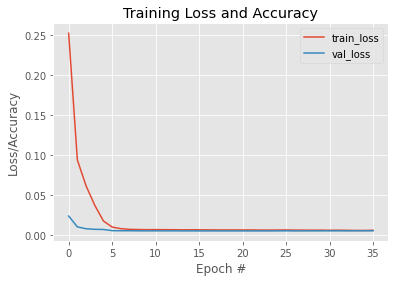

In [14]:
# comenzamos con el entrenamiento
epochs = 200
batch_size = 256

# como entrenariamos normalmente
es_cnn = EarlyStopping(monitor='val_loss', mode='min', patience=15) 

history =model_im.fit(im_train_resized, y_train,
                    batch_size=batch_size,
                    validation_data=(im_val_resized, y_val),
                    epochs=epochs,
                    callbacks=[es_cnn])


# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history["loss"])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history["val_loss"])), history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [15]:
# Predicción con validation de imagenes
y_im_predval=model_im.predict(im_val_resized)
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_im_predval_original=yScalerFit.inverse_transform(y_im_predval)


 
TestingData=pd.DataFrame()
TestingData['Price']=pd.DataFrame(y_val_original)
TestingData['PredictedPrice']=pd.DataFrame(y_im_predval_original)
TestingData.head()

12/12 [==============================] - 5s 218ms/step


,Price,PredictedPrice
0,40.0,54.422287
1,40.0,47.783634
2,82.0,53.948284
3,25.0,71.860046
4,60.0,63.138847


In [18]:
# Evaluamos el modelo con datos de val
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

# calculate root mean squared error

rmse = math.sqrt(mean_squared_error(y_im_predval_original, y_val_original))
print('Test Score: %.2f RMSE' % (rmse))

# calculate mae: mean absolute error

mae = mean_absolute_error(y_im_predval_original, y_val_original)
print('Test Score: %.2f MAE' % (mae))

# calculamos mape
mape = mean_absolute_percentage_error(y_im_predval_original, y_val_original)
print('Test Score: %.2f MAPE' % (mape))

results=pd.read_csv(path+'modelos/resultados_train.csv') #cargo de nuevo porque se roto la sesion de colab

results_last=pd.DataFrame()
results_last['Modelo']=['CNN_vgg16']
results_last['RMSE']=rmse
results_last['MAE']=mae
results_last['MAPE']=mape
results_last['nombre_modelo']='model_CNN_vgg16.h5'
model_im.save(path+'modelos/model_CNN_vgg16.h5')

results=pd.concat([results,results_last])
results.to_csv(path+'modelos/resultados_train.csv')

Test Score: 59.33 RMSE
Test Score: 33.86 MAE
Test Score: 0.59 MAPE


## Prueba con transfer learning de otros modelos

In [20]:
# importamos los paquetes necesarios
from tensorflow.keras import optimizers, Model
from tensorflow.keras.applications import InceptionV3, Xception, VGG16, VGG19, ResNet50
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import urllib
import cv2
import matplotlib.pyplot as plt
import imageio as io

# creamos el modelo base
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [17]:
# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
  if layer.name == 'block14_sepconv1':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada')

# cogemos la última capa del model y el regresor (top_model)
last = base_model.layers[-1].output
x = Dropout(0.5) (last)
x = GlobalAveragePooling2D(name="avg_pool")(x)
x = Dense(512, activation='relu', name='fc1')(x)
x = Dropout(0.3) (x)
x = Dense(1, name='prediction')(x)
model_im2 = Model(base_model.input, x)

# # compilamos el modelo
model_im2.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# vemos la estructura del modelo
model_im2.summary()

Capa input_1 congelada
Capa block1_conv1 congelada
Capa block1_conv1_bn congelada
Capa block1_conv1_act congelada
Capa block1_conv2 congelada
Capa block1_conv2_bn congelada
Capa block1_conv2_act congelada
Capa block2_sepconv1 congelada
Capa block2_sepconv1_bn congelada
Capa block2_sepconv2_act congelada
Capa block2_sepconv2 congelada
Capa block2_sepconv2_bn congelada
Capa conv2d congelada
Capa block2_pool congelada
Capa batch_normalization congelada
Capa add congelada
Capa block3_sepconv1_act congelada
Capa block3_sepconv1 congelada
Capa block3_sepconv1_bn congelada
Capa block3_sepconv2_act congelada
Capa block3_sepconv2 congelada
Capa block3_sepconv2_bn congelada
Capa conv2d_1 congelada
Capa block3_pool congelada
Capa batch_normalization_1 congelada
Capa add_1 congelada
Capa block4_sepconv1_act congelada
Capa block4_sepconv1 congelada
Capa block4_sepconv1_bn congelada
Capa block4_sepconv2_act congelada
Capa block4_sepconv2 congelada
Capa block4_sepconv2_bn congelada
Capa conv2d_2 cong

Epoch 1/100
6/6 [==============================] - 29s 6s/step - loss: 0.0696 - val_loss: 0.0394
Epoch 2/100
6/6 [==============================] - 10s 2s/step - loss: 0.0404 - val_loss: 0.0242
Epoch 3/100
6/6 [==============================] - 10s 2s/step - loss: 0.0305 - val_loss: 0.0311
Epoch 4/100
6/6 [==============================] - 10s 2s/step - loss: 0.0239 - val_loss: 0.0191
Epoch 5/100
6/6 [==============================] - 10s 2s/step - loss: 0.0203 - val_loss: 0.0165
Epoch 6/100
6/6 [==============================] - 10s 2s/step - loss: 0.0169 - val_loss: 0.0128
Epoch 7/100
6/6 [==============================] - 10s 2s/step - loss: 0.0130 - val_loss: 0.0124
Epoch 8/100
6/6 [==============================] - 10s 2s/step - loss: 0.0106 - val_loss: 0.0110
Epoch 9/100
6/6 [==============================] - 10s 2s/step - loss: 0.0103 - val_loss: 0.0109
Epoch 10/100
6/6 [==============================] - 9s 2s/step - loss: 0.0087 - val_loss: 0.0113
Epoch 11/100
6/6 [============

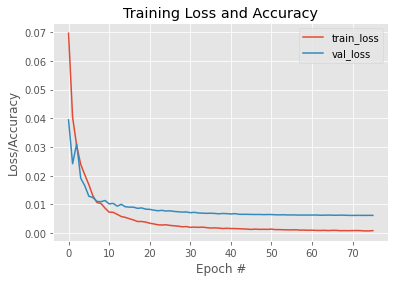

In [19]:
# comenzamos con el entrenamiento
epochs = 100
batch_size = 256

# como entrenariamos normalmente
es_cnn = EarlyStopping(monitor='val_loss', mode='min', patience=5) 

history =model_im2.fit(im_train_resized, y_train,
                    batch_size=batch_size,
                    validation_data=(im_val_resized, y_val),
                    epochs=epochs,
                    callbacks=[es_cnn])


# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history["loss"])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history["val_loss"])), history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [20]:
# Predicción con validation de imagenes
y_im_predval=model_im2.predict(im_val_resized)
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_im_predval_original=yScalerFit.inverse_transform(y_im_predval)


 
TestingData=pd.DataFrame()
TestingData['Price']=pd.DataFrame(y_val_original)
TestingData['PredictedPrice']=pd.DataFrame(y_im_predval_original)
TestingData.head()

12/12 [==============================] - 5s 199ms/step


,Price,PredictedPrice
0,40.0,45.263699
1,40.0,53.486443
2,82.0,49.138138
3,25.0,61.347588
4,60.0,28.415951


In [27]:
# Evaluamos el modelo con datos de test
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

# calculate root mean squared error

rmse = math.sqrt(mean_squared_error(y_im_predval_original, y_val_original))
print('Test Score: %.2f RMSE' % (rmse))

# calculate mae: mean absolute error

mae = mean_absolute_error(y_im_predval_original, y_val_original)
print('Test Score: %.2f MAE' % (mae))

# calculamos mape
mape = mean_absolute_percentage_error(y_im_predval_original, y_val_original)
print('Test Score: %.2f MAPE' % (mape))

results=pd.read_csv(path+'modelos/resultados_train.csv') #cargo de nuevo porque se roto la sesion de colab
results_last=pd.DataFrame()
results_last['Modelo']=['CNN_Xception']
results_last['RMSE']=rmse
results_last['MAE']=mae
results_last['MAPE']=mape
results_last['nombre_modelo']='model_CNN_Xception.h5'
model_im2.save(path+'modelos/model_CNN_Xception.h5')

results=pd.concat([results,results_last])

results.to_csv(path+'modelos/resultados_train.csv', index=False)

Test Score: 65.84 RMSE
Test Score: 41.26 MAE
Test Score: 1.06 MAPE


In [28]:
results

,Unnamed: 0,Modelo,RMSE,MAE,MAPE,nombre_modelo
0,0.0,ANN,46.936785,20.264633,0.382584,model_ANN.h5
1,0.0,ANN_opt,40.441463,22.174349,0.307909,model_ANN_opt.h5
2,0.0,CNN_vgg16,58.418687,34.925534,0.530373,model_CNN_vgg16.h5
3,0.0,CNN_vgg16,58.418687,34.925534,0.530373,model_CNN_vgg16.h5
4,0.0,CNN_Xception,66.014050,40.473095,0.821547,model_CNN_Xception.h5
0,NaN,CNN_Xception,65.839389,41.256484,1.062817,model_CNN_Xception.h5


## Optimización de parametros CNN

In [13]:
# imports necesarios
import sys
import time
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space =  {
    'dropout' : hp.uniform('dropout',0.0,0.6),
    'neurons_dense1': hp.choice('neurons_dense1', [100,256,512]),
    'learning_rate': hp.choice('learning_rate',[0.1,0.01,0.001,0.0001]),
    'n_epochs': hp.choice('n_epochs',[50,100,200])
}

# nos definimos unos callbacks para que la red pare cuando no vea mejora 

def	get_callbacks(pars):
  callbacks	= [EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, mode='auto')]
  return callbacks

def mi_cnn(pars):
  print ('Parameters: ', pars)

  base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
  for layer in base_model.layers:
    if layer.name == 'block5_conv1':
      break
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada')

  # cogemos la última capa del model y el regresor (top_model)
  last = base_model.layers[-1].output
  x = GlobalAveragePooling2D(name="avg_pool")(last)
  x = Dense(pars['neurons_dense1'], activation='relu', name='fc1')(x)
  x = Dropout(pars['dropout']) (x)
  x = Dense(1, name='prediction')(x)
  model_im = Model(base_model.input, x)

 # Compilamos y entrenamos 

  model_im.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=pars['learning_rate'])) 
  H = model_im.fit(im_train_resized, y_train, validation_data=(im_val_resized, y_val), epochs=pars['n_epochs'], callbacks=get_callbacks(pars)) 

  print(H.history)
  
  best_epoch_loss = np.argmin(H.history['val_loss'])
  best_val_loss = np.min(H.history['val_loss'])
  
  print('Epoch {} - val loss: {}'.format(best_epoch_loss, best_val_loss))
  sys.stdout.flush()
  
  return {'loss': best_val_loss, 'best_epoch': best_epoch_loss, 'eval_time': time.time(), 'status': STATUS_OK, 'model': model_im, 'history': H}

In [14]:
# ejecutamos la optimización
trials = Trials()
best = fmin(mi_cnn, space, algo=tpe.suggest, max_evals=10, trials=trials)
print(best)

Se han truncado las últimas 5000 líneas del flujo de salida.
45/45 [==============================] - 9s 192ms/step - loss: 0.0409 - val_loss: 0.0388

Epoch 8/100

45/45 [==============================] - 9s 191ms/step - loss: 0.0407 - val_loss: 0.0390

Epoch 9/100

45/45 [==============================] - 9s 190ms/step - loss: 0.0405 - val_loss: 0.0392

Epoch 10/100

45/45 [==============================] - 9s 192ms/step - loss: 0.0406 - val_loss: 0.0388

Epoch 11/100

45/45 [==============================] - 9s 193ms/step - loss: 0.0406 - val_loss: 0.0387

Epoch 12/100

45/45 [==============================] - 9s 196ms/step - loss: 0.0408 - val_loss: 0.0387

Epoch 13/100

45/45 [==============================] - 9s 198ms/step - loss: 0.0402 - val_loss: 0.0387

Epoch 14/100

45/45 [==============================] - 9s 197ms/step - loss: 0.0406 - val_loss: 0.0388

Epoch 15/100

45/45 [==============================] - 9s 196ms/step - loss: 0.0401 - val_loss: 0.0387

{'loss': [0.2343486

In [15]:
space_dict =  {
    'neurons_dense1': [100,256,512,1024],
    'learning_rate': [0.1,0.01,0.001,0.0001],
    'n_epochs': [50,100,200,500]
}

print('El valor de dropout opt es: '+str(best['dropout']))
print('El valor de opt neurons_dense1 es: '+str(space_dict['neurons_dense1'][best['neurons_dense1']]))

print('El valor de opt n_epochs es: '+str(space_dict['n_epochs'][best['n_epochs']]))
print('El valor de opt learning_rate es: '+str(space_dict['learning_rate'][best['learning_rate']]))

El valor de dropout opt es: 0.5963279589228758
El valor de opt neurons_dense1 es: 512
El valor de opt n_epochs es: 100
El valor de opt learning_rate es: 0.0001


Capa input_12 congelada
Capa block1_conv1 congelada
Capa block1_conv2 congelada
Capa block1_pool congelada
Capa block2_conv1 congelada
Capa block2_conv2 congelada
Capa block2_pool congelada
Capa block3_conv1 congelada
Capa block3_conv2 congelada
Capa block3_conv3 congelada
Capa block3_pool congelada
Capa block4_conv1 congelada
Capa block4_conv2 congelada
Capa block4_conv3 congelada
Capa block4_pool congelada
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 1

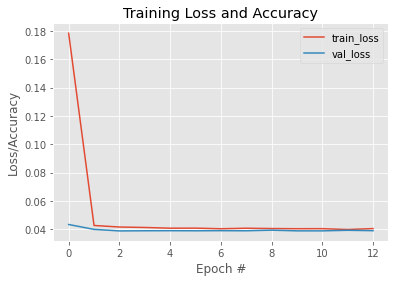

In [17]:
# Utilizando los parametros optimizados
lr = space_dict['learning_rate'][best['learning_rate']]
n_epochs = space_dict['n_epochs'][best['n_epochs']]
dropout_opt=best['dropout']
neurons_dense1=space_dict['neurons_dense1'][best['neurons_dense1']]

base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada')

  # cogemos la última capa del model y el regresor (top_model)
last = base_model.layers[-1].output
x = GlobalAveragePooling2D(name="avg_pool")(last)
x = Dense(neurons_dense1, activation='relu', name='fc1')(x)
x = Dropout(dropout_opt) (x)

x = Dense(1, name='prediction')(x)
model_im_opt = Model(base_model.input, x)
model_im_opt.summary()
 # Compilamos y entrenamos 

callbacks	= [EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, mode='auto')]

model_im_opt.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=lr)) 
H = model_im_opt.fit(im_train_resized, y_train, validation_data=(im_val_resized, y_val), epochs=n_epochs, callbacks=[callbacks]) 


# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [18]:
# Predicción con validation de imagenes
y_im_predval=model_im_opt.predict(im_val_resized)
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_im_predval_original=yScalerFit.inverse_transform(y_im_predval)


 
TestingData=pd.DataFrame()
TestingData['Price']=pd.DataFrame(y_val_original)
TestingData['PredictedPrice']=pd.DataFrame(y_im_predval_original)
TestingData.head()

12/12 [==============================] - 2s 136ms/step


,Price,PredictedPrice
0,40.0,44.482063
1,40.0,49.221931
2,82.0,53.373158
3,25.0,53.967026
4,60.0,49.862221


In [19]:
# Evaluamos el modelo con datos de test
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


# calculate root mean squared error

rmse = math.sqrt(mean_squared_error(y_im_predval_original, y_val_original))
print('Test Score: %.2f RMSE' % (rmse))

# calculate mae: mean absolute error

mae = mean_absolute_error(y_im_predval_original, y_val_original)
print('Test Score: %.2f MAE' % (mae))

# calculamos mape
mape = mean_absolute_percentage_error(y_im_predval_original, y_val_original)
print('Test Score: %.2f MAPE' % (mape))

results=pd.read_csv(path+'modelos/resultados_train.csv') #cargo de nuevo porque se roto la sesion de colab

results_last=pd.DataFrame()
results_last['Modelo']=['CNN_opt']
results_last['RMSE']=rmse
results_last['MAE']=mae
results_last['MAPE']=mape
results_last['nombre_modelo']='model_CNN_opt.h5'
model_im_opt.save(path+'modelos/model_CNN_opt.h5')

results=pd.concat([results,results_last])

results.to_csv(path+'modelos/resultados_train.csv', index=False)

Test Score: 60.40 RMSE
Test Score: 32.72 MAE
Test Score: 0.67 MAPE


# Modelo 1 combinando datos e imagenes (ANN + CNN)

In [13]:
# Imports necesarios
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

# Creamos modelo de datos 1D

input_1d= Input(shape=(X_train.shape[1]), name="Input_1d")

model_1d = Dense(42, activation='relu') (input_1d)
model_1d = Dropout(0.3) (model_1d)
model_1d_out = Dense(20, activation='relu') (model_1d)


# Creamos modelo para datos imagenes
input_img = Input(shape=(224, 224, 3), name="Input_img")
model_2d = Conv2D(128, kernel_size=(3,3), activation='relu') (input_img)
model_2d = MaxPooling2D(pool_size=(2,2)) (model_2d)
model_2d = Dropout(0.3) (model_2d)

model_2d = Conv2D(64, kernel_size=(3,3), activation='relu') (model_2d)
model_2d = MaxPooling2D(pool_size=(2,2)) (model_2d)
model_2d = GlobalAveragePooling2D(name="avg_pool")(model_2d)
model_2d_out = Dense(20, activation='relu') (model_2d)

#combinamos los inputs
combinedmodel = concatenate([model_1d_out, model_2d_out])

x = Dense(4, activation="relu")(combinedmodel)
x = Dense(1, activation="linear")(x)

model_full = Model(inputs=[input_1d, input_img], outputs=x)

model_full.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_img (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 222, 222, 12  3584        ['Input_img[0][0]']              
                                8)                                                                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 111, 111, 12  0          ['conv2d_2[0][0]']               
                                8)                                                          

In [24]:
# Hiper-parámetros de nuestra red
lr = 0.001
n_epochs = 50
batch_size = 128 #tuve que reducir batchsize porque no entrenaba

In [23]:
X_val.shape

(360, 42)

Epoch 1/50
12/12 [==============================] - 21s 1s/step - loss: 0.0628 - val_loss: 0.0534
Epoch 2/50
12/12 [==============================] - 11s 945ms/step - loss: 0.0519 - val_loss: 0.0453
Epoch 3/50
12/12 [==============================] - 11s 941ms/step - loss: 0.0459 - val_loss: 0.0413
Epoch 4/50
12/12 [==============================] - 11s 940ms/step - loss: 0.0427 - val_loss: 0.0395
Epoch 5/50
12/12 [==============================] - 11s 938ms/step - loss: 0.0413 - val_loss: 0.0389
Epoch 6/50
12/12 [==============================] - 11s 942ms/step - loss: 0.0408 - val_loss: 0.0388
Epoch 7/50
12/12 [==============================] - 11s 945ms/step - loss: 0.0407 - val_loss: 0.0388
Epoch 8/50
12/12 [==============================] - 11s 946ms/step - loss: 0.0407 - val_loss: 0.0388
Epoch 9/50
12/12 [==============================] - 11s 952ms/step - loss: 0.0407 - val_loss: 0.0388
Epoch 10/50
12/12 [==============================] - 11s 949ms/step - loss: 0.0407 - val_loss:

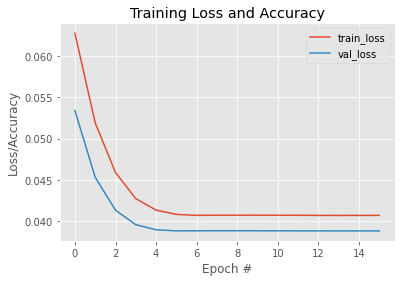

In [25]:
# Compilamos y entrenamos 

callbacks	= [EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, mode='auto')]
# model_full.summary()
model_full.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=lr)) 
hist_full = model_full.fit(x=[X_train,im_train_resized], y=y_train, validation_data=([X_val,im_val_resized], y_val), epochs=n_epochs, batch_size=batch_size, callbacks =[callbacks]) 


# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(hist_full.history["loss"])), hist_full.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(hist_full.history["val_loss"])), hist_full.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [26]:
# Predicción con validation de imagenes
y_full_predval=model_full.predict([X_val,im_val_resized])
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_full_predval_original=yScalerFit.inverse_transform(y_full_predval)


 
TestingData=pd.DataFrame()
TestingData['Price']=pd.DataFrame(y_val_original)
TestingData['PredictedPrice']=pd.DataFrame(y_full_predval_original)
TestingData.head()

12/12 [==============================] - 1s 45ms/step


,Price,PredictedPrice
0,40.0,50.225983
1,40.0,50.225983
2,82.0,50.225983
3,25.0,50.225983
4,60.0,50.225983


In [28]:
# Evaluamos el modelo con datos de test
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


# calculate root mean squared error

rmse = math.sqrt(mean_squared_error(y_full_predval_original, y_val_original))
print('Test Score: %.2f RMSE' % (rmse))

# calculate mae: mean absolute error

mae = mean_absolute_error(y_full_predval_original, y_val_original)
print('Test Score: %.2f MAE' % (mae))

# calculamos mape
mape = mean_absolute_percentage_error(y_full_predval_original, y_val_original)
print('Test Score: %.2f MAPE' % (mape))

results=pd.read_csv(path+'modelos/resultados_train.csv') #cargo de nuevo porque se roto la sesion de colab

results_last=pd.DataFrame()
results_last['Modelo']=['ANN+CNN']
results_last['RMSE']=rmse
results_last['MAE']=mae
results_last['MAPE']=mape
results_last['nombre_modelo']='model_ANN+CNN.h5'
model_full.save(path+'modelos/model_ANN+CNN.h5')

results=pd.concat([results,results_last])
results.to_csv(path+'modelos/resultados_train.csv',index=False)


Test Score: 60.05 RMSE
Test Score: 32.58 MAE
Test Score: 0.65 MAPE


# Modelo 2 combinando datos e imagenes (CNN transfer learning + ANN)

In [33]:
# Imports necesarios
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

# Creamos modelo de datos 1D

input_1d= Input(shape=(X_train.shape[1]), name="Input_1d")

model_1d = Dense(42, activation='relu') (input_1d)
model_1d = Dropout(0.3) (model_1d)
model_1d_out = Dense(20, activation='relu') (model_1d)


# Creamos modelo para datos imagenes
input_img = Input(shape=(224, 224, 3), name="Input_img")

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_img)
for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False

last = base_model.layers[-1].output 
model_2d = Conv2D(128, kernel_size=(3,3), activation='relu') (last)
model_2d = MaxPooling2D(pool_size=(2,2)) (model_2d)
model_2d = Dropout(0.3) (model_2d)
model_2d = GlobalAveragePooling2D(name="avg_pool")(model_2d)
model_2d_out = Dense(20, activation='relu') (model_2d)

#combinamos los inputs
combinedmodel = concatenate([model_1d_out, model_2d_out])

x = Dense(4, activation="relu")(combinedmodel)
x = Dense(1, activation="linear")(x)

model_full2 = Model(inputs=[input_1d, input_img], outputs=x)

model_full2.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_img (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['Input_img[0][0]']              
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

In [34]:
# Hiper-parámetros de nuestra red
lr = 0.0001
n_epochs = 50
batch_size = 128

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_img (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['Input_img[0][0]']              
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

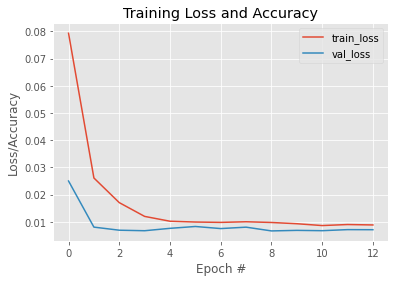

In [35]:
# Compilamos y entrenamos 

callbacks	= [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, mode='auto')]
model_full2.summary()
model_full2.compile(loss='mse', optimizer=Adam(learning_rate=lr)) 
hist_full2 = model_full2.fit(x=[X_train,im_train_resized], y=y_train, validation_data=([X_val,im_val_resized], y_val), epochs=n_epochs, batch_size=batch_size, callbacks =[callbacks]) 


# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(hist_full2.history["loss"])), hist_full2.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(hist_full2.history["val_loss"])), hist_full2.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [36]:
# Predicción con validation de imagenes
y_full_predval=model_full2.predict([X_val,im_val_resized])
 
# Scaling the predicted Price data back to original price scale
y_val_original=yScalerFit.inverse_transform(y_val)
y_full_predval_original=yScalerFit.inverse_transform(y_full_predval)


 
TestingData=pd.DataFrame()
TestingData['Price']=pd.DataFrame(y_val_original)
TestingData['PredictedPrice']=pd.DataFrame(y_full_predval_original)
TestingData.head()

12/12 [==============================] - 3s 234ms/step


,Price,PredictedPrice
0,40.0,49.536129
1,40.0,18.165693
2,82.0,19.791861
3,25.0,46.404259
4,60.0,34.979721


In [37]:
# Evaluamos el modelo con datos de test
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


# calculate root mean squared error

rmse = math.sqrt(mean_squared_error(y_full_predval_original, y_val_original))
print('Test Score: %.2f RMSE' % (rmse))

# calculate mae: mean absolute error

mae = mean_absolute_error(y_full_predval_original, y_val_original)
print('Test Score: %.2f MAE' % (mae))

# calculamos mape
mape = mean_absolute_percentage_error(y_full_predval_original, y_val_original)
print('Test Score: %.2f MAPE' % (mape))

results=pd.read_csv(path+'modelos/resultados_train.csv') #cargo de nuevo porque se roto la sesion de colab

results_last=pd.DataFrame()
results_last['Modelo']=['ANN+CNN_vgg16']
results_last['RMSE']=rmse
results_last['MAE']=mae
results_last['MAPE']=mape
results_last['nombre_modelo']='model_ANN+CNN_vgg16.h5'
model_full2.save(path+'modelos/model_ANN+CNN_vgg16.h5')

results=pd.concat([results,results_last])

Test Score: 70.87 RMSE
Test Score: 43.47 MAE
Test Score: 2.29 MAPE


In [38]:
results.to_csv(path+'modelos/resultados_train.csv')